## Tansform .ibd to the genetic map
The idea is to have distance in cM, the more natural unit for merging and .IBD block analysis

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
### Load the Files
ibd_folder_raw = "../Data/IBD_raw/"
file_raw = "CBchrMAF01.ibd25.ibd"


### Load the old Data
df = pd.read_csv(ibd_folder_raw + file_raw, sep="\t", header=None)  
columns = ["Ind1", "HapIndex1", "Ind2", "HapIndex2","Scaffold", "IBDStart", "IBDEnd", "Lod", "IBDlen"] 
df.columns = columns

### Load the genetic map
ld_folder = "../Data/LinkageMap/"
ld_file = "7LGs_0916.fmap"
l_df = pd.read_csv(ld_folder + ld_file, sep="\t")  

ld_columns = ["LG", "Scaffold", "Bin", "cm", "Bin_End", "Method", "Start", "End"]
l_df.columns = ld_columns

## Create the mapping

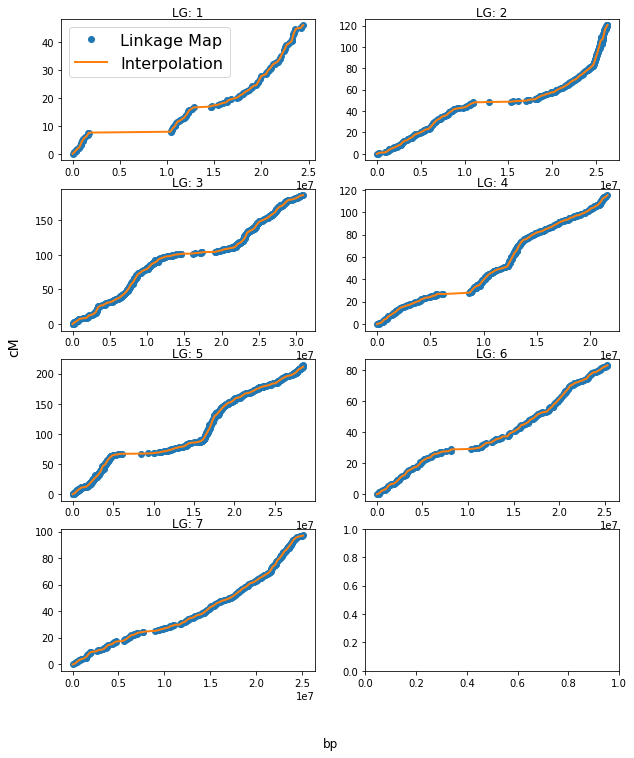

In [120]:
# For every Linkage Group make mapping df. I.e. make list of dataframe.

mapping=[] # List of mapping functions!! (i.e. scipy interpolation object)
max_bps = [] # The upper limits (mainly for plotting)

## For the moment only try out first linkage group:

for lg in range(1,8):

    l_df1 = l_df.loc[l_df["LG"]==lg]
    assert(len(l_df1)>0)
    dup = l_df1["cm"].duplicated(keep="first")
    data = l_df1[~dup][["cm", "Bin_End"]].values
    bp = data[:, 1]
    cm = data[:, 0]

    ### Create the Interpolation object:
    f = interp1d(bp, cm, fill_value="extrapolate")
    mapping.append(f)  # add to mapping
    max_bps.append(np.max(bp))
    #f2 = interp1d(bp, cm, kind='cubic', fill_value="extrapolate")



### Do a plot
fig, axarr = plt.subplots(4, 2, figsize=(10,12))
axarr = axarr.flatten() # Flatten the array for better Looping


for i in range(len(mapping)):
    f = mapping[i]
    ax = axarr[i]

    xnew = np.linspace(0, max_bps[i], num=100, endpoint=True)

    # Extract the Data from linkage map:
    l_df1 = l_df.loc[l_df["LG"]==(i+1)]
    assert(len(l_df1)>0)
    dup = l_df1["cm"].duplicated(keep="first")
    data = l_df1[~dup][["cm", "Bin_End"]].values
    bp = data[:, 1]
    cm = data[:, 0]

    ax.plot(bp, cm, 'o', xnew, f(xnew), '-', linewidth=2)
    ax.set_title("LG: %i" % (i+1), fontsize=12, pad=2)
axarr[0].legend(['Linkage Map', 'Interpolation'], loc='upper left', fontsize=16)

# Set the Labels
fig.text(0.5, 0.04, 'bp', ha='center', va='center', fontsize=12)
fig.text(0.06, 0.5, 'cM', ha='center', va='center', rotation='vertical', fontsize=14)

#plt.tight_layout()
plt.show()

In [102]:
# Plot distribution of recombination rates:
lg=8

l_df1 = l_df.loc[l_df["LG"]==lg]
assert(len(l_df1)>0)
dup = l_df1["cm"].duplicated(keep="first")
data = l_df1[~dup][["cm", "Bin_End"]].values
bp = data[:, 1]
cm = data[:, 0]

d_cm = cm[1:] - cm[:-1]
d_bp = bp[1:] - bp[:-1]

print(np.min(d_cm))
print(np.min(d_bp))



plt.figure()

plt.hist(d_cm/(1e-6 * d_bp), bins=50)
plt.ylabel("Count")
plt.xlabel("cM per mbp")

plt.show()

AssertionError: 

In [33]:
f(2e7)

array(27.96581195)

## Do the transformation

## Area 51

In [119]:
cm = l_df["cm"].values
d_cm = cm[1:]-cm[:-1]

i_down = np.where(d_cm<0)[0]
i_up = i_down+1

inds = np.unique(np.concatenate((i_down, i_up)))
l_df.iloc[inds]

,LG,Scaffold,Bin,cm,Bin_End,Method,Start,End
737,1,Scaffold13404,40,16.9760,14643806,M,800001,820000
738,1,Scaffold13404,41,16.8165,14663806,I,820001,840000
739,1,Scaffold13404,42,16.6570,14683806,M,840001,860000
1099,1,Scaffold22157,45,33.2330,21735057,M,920000,900001
1100,1,Scaffold22157,44,32.9170,21755057,M,900000,880001
1239,1,Scaffold29223,0,46.2530,24515391,M,20000,1
1240,2,Scaffold6758,21,0.0000,16144,M,436144,420001
1248,2,Scaffold6758,13,0.3200,176144,M,280000,260001
1249,2,Scaffold6758,12,0.0000,196144,M,260000,240001
1573,2,Scaffold15697,16,30.2710,6656666,M,320001,340000


In [117]:
inds

array([ 737,  738, 1099, 1239, 1248, 1573, 2025, 2306, 2310, 2348, 2384,
       2469, 2472, 2474, 2485, 2500, 2507, 2508, 2515, 2518, 2519, 2520,
       2522, 2524, 2525, 2529, 2531, 2533, 2535, 2536, 2540, 2547, 2548,
       2556, 2558, 2560, 2564, 2566, 2568, 2571, 2574, 2577, 2584, 2585,
       2589, 2607, 2724, 2727, 2733, 2738, 2740, 2744, 2837, 2854, 2889,
       2893, 2897, 2899, 2901, 2904, 2905, 2911, 2912, 2914, 2916, 2928,
       2931, 2933, 2940, 2942, 2943, 2944, 2949, 2952, 2954, 2965, 2969,
       2972, 2974, 2976, 2978, 2979, 2982, 2985, 2990, 2991, 2994, 3003,
       3005, 3006, 3016, 3018, 3064, 3069, 3071, 3072, 3073, 3076, 3077,
       3079, 3083, 3085, 3087, 3091, 3097, 3101, 3106, 3107, 3108, 3111,
       3112, 3114, 3115, 3118, 3120, 3126, 3128, 3130, 3132, 3133, 3135,
       3136, 3138, 3140, 3142, 3143, 3145, 3147, 3153, 3155, 3156, 3589,
       3652, 3655, 3657, 3659, 3664, 3666, 3668, 3671, 3681, 3682, 3683,
       3698, 3700, 3703, 3707, 3708, 3720, 3722, 37

In [126]:
a=[6, 12, 14]

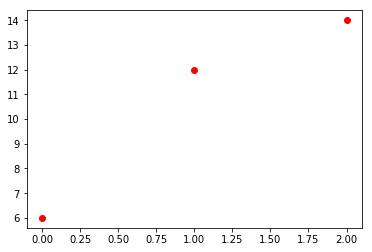

In [127]:
plt.figure()
plt.plot(a, "ro")
plt.show()